In [2]:
%matplotlib notebook
import numpy             as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import scipy.integrate as integrate
import matplotlib.animation as anim
from statistics import mode
import urllib.request

In [3]:
url = 'https://raw.githubusercontent.com/asegura4488/Database/main/MetodosComputacionalesReforma/Gaussiano.csv'

In [4]:
filename = 'Gaussiano.csv'

In [5]:
urllib.request.urlretrieve(url, filename)

('Gaussiano.csv', <http.client.HTTPMessage at 0x21575f15520>)

In [65]:
datan = np.loadtxt(filename,dtype=str,skiprows=1)
data = np.zeros(len(datan))
for i in range(len(data)):
    data[i] = float(datan[i])
len(data)

100

In [82]:
def LogPrior(p):
    u,s = p
    
    if 3 <= u <= 5. and 0.5 <= s <= 3.5:
        return 0.
    else:
        return -np.inf

In [29]:
def Prior(u,s):
    a = ((u>= 3 and u <= 5) and (s>= 0.5 and s <= 3.5))
    b = ((u<3 and u > 5) and (s< 0.5 and s > 3.5))
    r = np.piecewise( [u, s], [a, b], [lambda u: 1, lambda u: 0])
    return np.sum(r)

Prior = np.vectorize(Prior)

In [89]:
def Gauss(p,x):  
    u,s = p
    return np.exp( -0.5*(x-u)**2/s**2  )/np.sqrt(2*np.pi*s**2)

In [90]:
def Posterior(x,u,s):
    return Gauss(x,u,s)*Prior(u,s)

In [91]:
def JointLikelihood(p,x):
    return np.sum( np.log(Gauss(p,x)) )

In [92]:
def LogPosterior(p,x):
    
    LogP = LogPrior(p)
    
    if not np.isfinite(LogP):
        return -np.inf
    else:
        return JointLikelihood(p,x) + LogP

In [93]:
def Metropolis(x0,p, Posterior, NSteps=int(1e4), delta= 0.4):
    
    x = np.zeros((NSteps,1))
    
    # Prior
    x[0] = x0[0]
    
    for i in tqdm(range(1,NSteps)):
        
        P0 = Posterior(p,x[i-1])
        
        xf = x[i-1] + delta*2*(np.random.rand()-0.5)
        
        P1 = Posterior(p,xf)
        
        alpha = np.minimum( 1, P1/P0 )
        g = np.random.rand()
        
        if alpha > g:
            x[i,0] = xf
        else:
            x[i,:] = x[i-1,:]
            
    return x[1000:,:]

In [94]:
MCMC = Metropolis(data,[3,2],LogPosterior)

100%|███████████████████████████████████████████████████████████████████████████| 9999/9999 [00:00<00:00, 32029.52it/s]


<IPython.core.display.Javascript object>


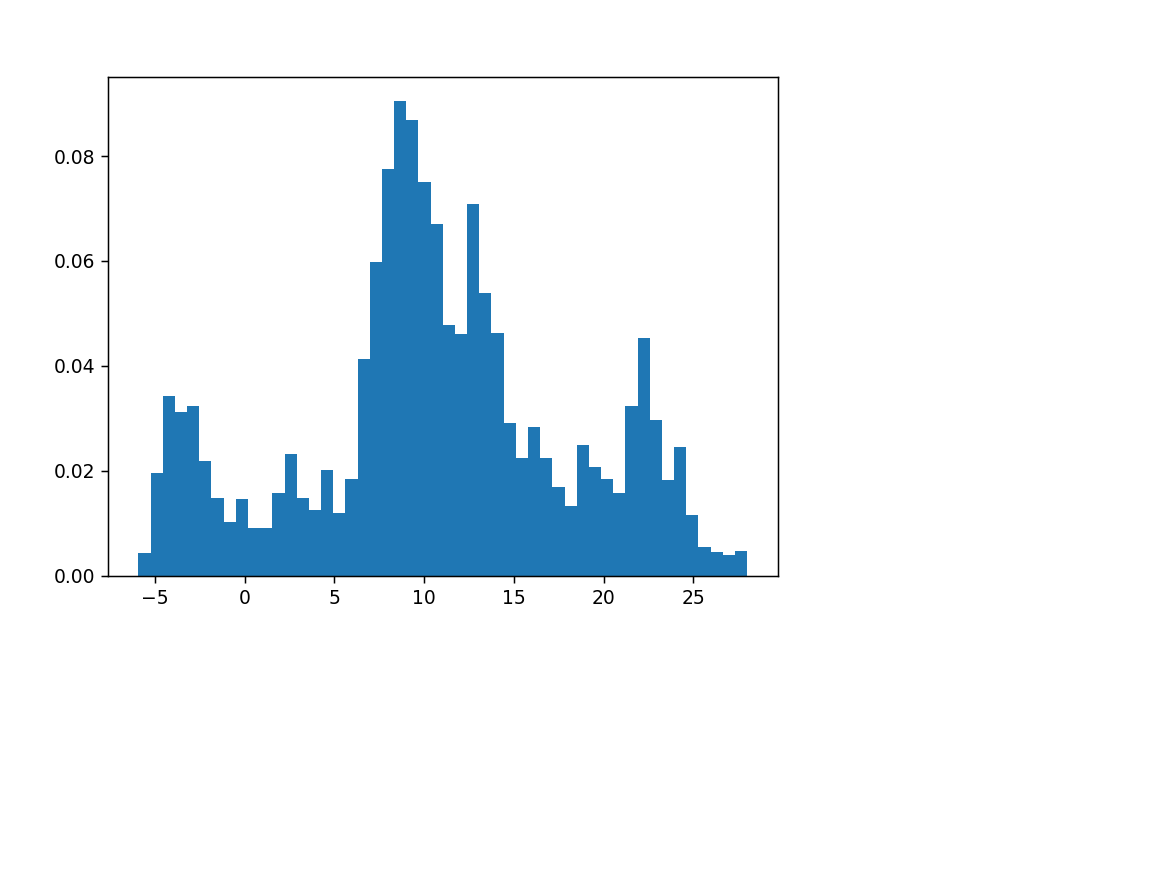

(array([0.00442242, 0.01965522, 0.03423284, 0.03112076, 0.03243111,
        0.02194833, 0.01474141, 0.0101552 , 0.01457762, 0.00917244,
        0.00917244, 0.01572417, 0.02325867, 0.01490521, 0.0124483 ,
        0.0201466 , 0.01195692, 0.01834487, 0.04127596, 0.05978462,
        0.07747432, 0.0905778 , 0.08681055, 0.07501742, 0.06699153,
        0.0478277 , 0.04602597, 0.07075878, 0.05388806, 0.04635356,
        0.02915524, 0.02243971, 0.02833627, 0.02243971, 0.01687073,
        0.01326727, 0.02489661, 0.02080177, 0.01834487, 0.01572417,
        0.03243111, 0.04537079, 0.02964662, 0.01818108, 0.02456902,
        0.01162934, 0.00556898, 0.00458622, 0.00393104, 0.00475001]),
 array([-5.91594536, -5.23758436, -4.55922336, -3.88086236, -3.20250136,
        -2.52414035, -1.84577935, -1.16741835, -0.48905735,  0.18930365,
         0.86766465,  1.54602565,  2.22438665,  2.90274765,  3.58110865,
         4.25946965,  4.93783065,  5.61619165,  6.29455266,  6.97291366,
         7.65127466,  8.32

In [95]:

plt.hist(MCMC,density=True,bins=50)

In [98]:
N = 100
mu = np.linspace(3,5,N)
sigma = np.linspace(0.5,3.5,N)
M,S = np.meshgrid(mu,sigma)
LikeF = np.zeros((N,N))

for i in range(N):
    for j in range(N):
        LikeF[i,j] = LogPosterior([mu[i],sigma[j]],data)
LikeF

array([[-880.69045572, -791.30663668, -716.62296657, ..., -233.55847427,
        -234.12028596, -234.6826261 ],
       [-872.56892238, -784.08675928, -710.16252112, ..., -233.38683597,
        -233.95163262, -234.51688052],
       [-864.61063768, -777.0120066 , -703.83193527, ..., -233.21864773,
        -233.78636933, -234.35446655],
       ...,
       [-852.98742694, -766.67920946, -694.58600649, ..., -232.97300592,
        -233.54499948, -234.11725816],
       [-860.70101246, -773.53642957, -700.72194122, ..., -233.13602276,
        -233.7051813 , -234.27467828],
       [-868.57784663, -780.53877439, -706.98773553, ..., -233.30248965,
        -233.86875317, -234.43542999]])

In [99]:
index = np.where( LikeF == np.amax(LikeF) )
muh = mu[index[1]][0]
sigmah = sigma[index[0]][0]

In [102]:
print('Los mejores valores para mu y sigma,',muh,sigmah)

Los mejores valores para mu y sigma, 3.8686868686868685 2.015151515151515
